In [11]:
import cv2 as cv
import numpy as np

Useful Function [ from basics.ipynb ]

In [12]:
def rescaling(frame, scale=1):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)
    dim = (width, height)
    return cv.resize(frame, dim, interpolation=cv.INTER_AREA)

def resizing(frame, width=None, height=None):
    if width is None and height is None:
        return frame
    else:
        return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA)

def croping(img, x1, x2, y1, y2):
    return img[y1:y2, x1:x2]

def translating(img, x, y):                                             # +ve x : right , +ve y : down
    import numpy as np
    transMat = np.float32([[1, 0, x], [0, 1, y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

def rotating(img, angle, rotPoint=None):                                # -ve angle : clockwise
    height, width = img.shape[:2]
    if rotPoint is None:
        rotPoint = (width//2, height//2)

    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1)
    dimensions = (width, height)
    return cv.warpAffine(img, rotMat, dimensions)

def flip(img, flipCode):                                                # 0 : vertical , 1 : horizontal , -1 : both
    return cv.flip(img, flipCode)

In [13]:
def gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def blur(img):
    return cv.GaussianBlur(img, (5, 5), 0)

def canny(img, minVal, maxVal):
    return cv.Canny(img, minVal, maxVal)

def dilate(img, kernel, iterations):
    return cv.dilate(img, kernel, iterations=iterations)

def erode(img, kernel, iterations):
    return cv.erode(img, kernel, iterations=iterations)

Colour Channels

In [14]:
img = rescaling(cv.imread("Data/Images/3.jpg"), 0.37)
cv.imshow('Original', img)

b, g, r = cv.split(img)
blank = np.zeros(img.shape[:2], dtype='uint8')
blue, green, red = cv.merge([b, blank, blank]), cv.merge([blank, g, blank]), cv.merge([blank, blank, r])
cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)

merged = cv.merge([b, g, r])
cv.imshow('Merged', merged)

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

Colour Spaces [ Palette Conversions ]

In [15]:
img = rescaling(cv.imread("Data/Images/3.jpg"), 0.37)
cv.imshow('Original', img)

rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('BGR to RGB', rgb)

grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)                              # Gray = (B + G + R) / 3, thus colour information is lost
cv.imshow('BGR to Gray', grey)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)                                # HSV [ H : Hue, S : Saturation, V : Value ]
cv.imshow('BGR to HSV', hsv)
bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv.imshow('HSV to BGR', bgr)

lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)                                # LAB [ L : Lightness, A : Green-Red, B : Blue-Yellow ]
cv.imshow('BGR to LAB', lab)
bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('LAB to BGR', bgr)

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

Blurring

In [16]:
img = rescaling(cv.imread("Data/Images/3.jpg"), 0.37)
cv.imshow('Original', img)

average = cv.blur(img, (3, 3))                                          # Average of all pixels in the kernel
cv.imshow('Average', average)

median = cv.medianBlur(img, 3)                                          # Reduces noise, but retains edges
cv.imshow('Median', median)

gaussian = cv.GaussianBlur(img, (3, 3), 0)                              # More effective than average, but less than median
cv.imshow('Gaussian', gaussian)

bilateral = cv.bilateralFilter(img, 10, 35, 25)                         # Most effective and retains edges
cv.imshow('Bilateral', bilateral)

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

Contour Detection

In [17]:
img = rescaling(cv.imread("Data/Images/3.jpg"), 0.37)
cv.imshow('Original', img)

pre = canny(blur(gray(img)), 125, 175)                                  # Preprocessing the image
_, pre = cv.threshold(gray(img), 125, 255, cv.THRESH_BINARY)            # Binarise (B&W) the image
cv.imshow('Preprocessed', pre)

contours, hierarchy = cv.findContours(pre, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contours found!')

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.drawContours(blank, contours, -1, (255, 255, 255), 1)
cv.imshow('Contours', blank)

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

156 contours found!


Edge Detection

In [18]:
img = rescaling(cv.imread("Data/Images/3.jpg"), 0.37)
cv.imshow('Original', img)

canny = cv.Canny(img, 125, 175)
cv.imshow('Canny', canny)


lap = cv.Laplacian(img, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

sobelX = cv.Sobel(img, cv.CV_64F, 1, 0)
sobelY = cv.Sobel(img, cv.CV_64F, 0, 1)
combined = cv.bitwise_or(sobelX, sobelY)
cv.imshow('Sobel', combined)

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

Thresholding [ An effective method of image segmentation, generally binarisation ]

In [19]:
img = gray(rescaling(cv.imread("Data/Images/3.jpg"), 0.37))
cv.imshow('Original', img)

# Simple Thresholding
_, thresh = cv.threshold(img, 128, 255, cv.THRESH_BINARY)               # cv.THRESH_BINARY_INV for inverse color
cv.imshow('SimpleThreshold', thresh)

# Adaptive Thresholding
adaptive = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 7, 9)
cv.imshow('AdaptiveThreshold', adaptive)

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

Some Data

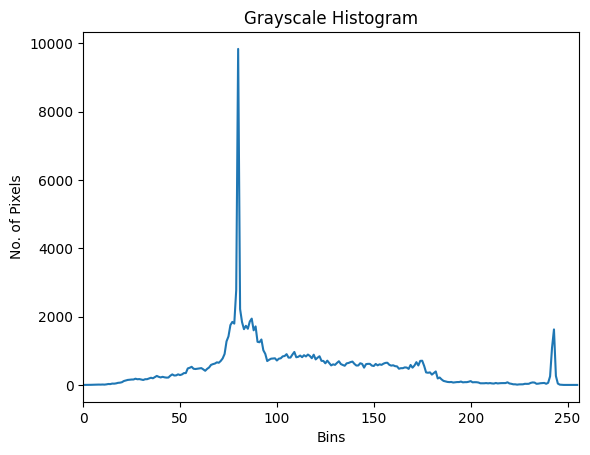

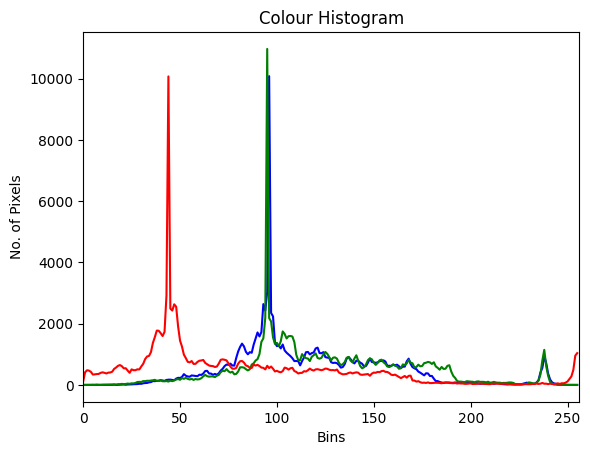

In [20]:
import matplotlib.pyplot as plt

img = rescaling(cv.imread("Data/Images/3.jpg"), 0.37)
cv.imshow('Original', img)

# Grayscale Histogram
gray_hist = cv.calcHist([gray(img)], [0], None, [256], [0, 256])
# gray_hist = cv.calcHist([gray(img)], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('No. of Pixels')
plt.plot(gray_hist)
plt.xlim([0, 256])
# plt.savefig('histogram.png')

# Colour Histogram
plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('No. of Pixels')
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
# plt.savefig('OpenCV/histogram.png')

if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()